# 1.데이터 불러오기

1. train.csv : 학습 데이터
        id : 샘플 아이디
        title : 제조사 모델명
        odometer : 주행 거리
        location : 판매처(나이지리아 도시)
        isimported : 현지 사용 여부
        engine : 엔진 종류
        transmission : 트랜스미션 종류
        fuel : 연료 종류
        paint : 페인트 색상
        year : 제조년도
        target : 자동차 가격




2. test.csv : 테스트 데이터
        id : 샘플 아이디
        title : 제조사 모델명
        odometer : 주행 거리
        location : 판매처(나이지리아 도시)
        isimported : 현지 사용 여부
        engine : 엔진 종류
        transmission : 트랜스미션 종류
        fuel : 연료 종류
        paint : 페인트 색상
        year : 제조년도


3. sample_submission.csv : 제출 양식
        id : 샘플 아이디
        target : 자동차 가격

In [ ]:
!pip install -U pandas-profiling
!pip install pycaret==2.3.10 markupsafe==2.0.1 pyyaml==5.4.1 -qq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 261 kB 17.6 MB/s 
     |████████████████████████████████| 3.1 MB 47.9 MB/s 
     |████████████████████████████████| 303 kB 40.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling

ImportError: ignored

In [ ]:
train = pd.read_csv('train_re.csv')
test = pd.read_csv('test_re.csv')

In [ ]:
train.info

<bound method DataFrame.info of         id                          title  odometer location    isimported  \
0        0                   Toyota RAV 4     18277   Lagos   Foreign Used   
1        1            Toyota Land Cruiser        10    Lagos          New    
2        2  Land Rover Range Rover Evoque     83091    Lagos  Foreign Used   
3        3                   Lexus ES 350     91524    Lagos  Foreign Used   
4        4                   Toyota Venza     94177    Lagos  Foreign Used   
...    ...                            ...       ...      ...           ...   
1008  1008                 Toyota Corolla     46768    Lagos  Foreign Used   
1009  1009                   Toyota Camry     31600    Abuja  Foreign Used   
1010  1010                   Toyota Camry     96802    Abuja  Foreign Used   
1011  1011                   Lexus GX 460    146275    Lagos  Foreign Used   
1012  1012                         DAF CF         0    Lagos  Locally used   

              engine transmissi

In [ ]:
test.info

<bound method DataFrame.info of       id                  title  odometer location    isimported  \
0      0    Mercedes-Benz C 300      1234    Abuja          New    
1      1           Honda Accord     29938    Abuja  Foreign Used   
2      2    Mercedes-Benz S 550     87501    Lagos  Foreign Used   
3      3          Toyota Sienna    180894    Lagos  Locally used   
4      4           Toyota Hiace    104814    Lagos  Foreign Used   
..   ...                    ...       ...      ...           ...   
431  431  Mercedes-Benz GLK 350     78175    Lagos  Foreign Used   
432  432        Honda Crosstour    129223    Lagos  Foreign Used   
433  433   Mercedes-Benz ML 350    100943    Lagos  Foreign Used   
434  434           Lexus GX 470     81463    Lagos  Foreign Used   
435  435          Toyota Sienna       646    Lagos  Foreign Used   

             engine transmission    fuel   paint  year          brand  
0    4-cylinder(I4)    automatic  petrol   white  2017  Mercedes-Benz  
1    4-

In [ ]:
train.isnull().sum()

id              0
title           0
odometer        0
location        0
isimported      0
engine          0
transmission    0
fuel            0
paint           0
year            0
target          0
brand           0
dtype: int64

In [ ]:
test.isnull().sum()

id              0
title           0
odometer        0
location        0
isimported      0
engine          0
transmission    0
fuel            0
paint           0
year            0
brand           0
dtype: int64

# 2.특이점 제거

In [ ]:
df_train = train.copy()
df_test = test.copy()

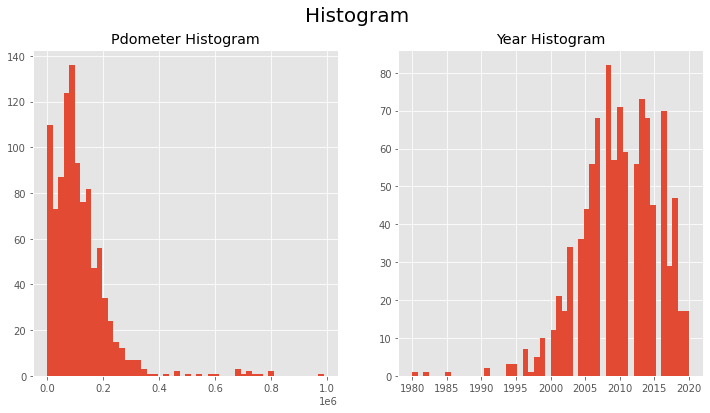

In [ ]:
plt.style.use('ggplot')

plt.figure(figsize = (12, 6))
plt.suptitle('Histogram', fontsize = 20)

plt.subplot(1, 2, 1)
plt.hist(df_train.odometer, bins = 50)              # 데이터 안의 일부 컬럼을 그래프로 표현하기 위해서는 데이터.컬럼명으로 이용한다.
plt.title('Pdometer Histogram')

plt.subplot(1, 2, 2)
plt.hist(df_train.year, bins = 50)
plt.title('Year Histogram')
plt.show()

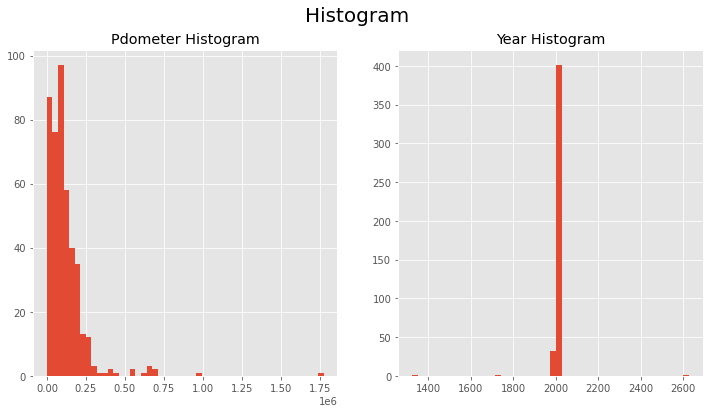

In [ ]:
plt.style.use('ggplot')

plt.figure(figsize = (12, 6))
plt.suptitle('Histogram', fontsize = 20)

plt.subplot(1, 2, 1)
plt.hist(df_test.odometer, bins = 50)              # 데이터 안의 일부 컬럼을 그래프로 표현하기 위해서는 데이터.컬럼명으로 이용한다.
plt.title('Pdometer Histogram')

plt.subplot(1, 2, 2)
plt.hist(df_test.year, bins = 50)
plt.title('Year Histogram')
plt.show()

In [ ]:
numeric_fts = ['odometer', 'year']
outlier_ind = []

for i in numeric_fts:
    q1 = np.percentile(df_train[i], 25)
    q3 = np.percentile(df_train[i], 75)
    iqr = q3 - q1

    outlier_list = df_train[(df_train[i] < q1 - iqr * 1.5) | (df_train[i] > q3 + iqr * 1.5)].index
    outlier_ind.extend(outlier_list)

In [ ]:
train_df = df_train.drop(outlier_ind, axis = 0).reset_index(drop = True)
train_df

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,red,2016,13665000,Toyota
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,black,2019,33015000,Toyota
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,red,2012,9915000,Land
3,3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,grey,2007,3815000,Lexus
4,4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,red,2010,7385000,Toyota
...,...,...,...,...,...,...,...,...,...,...,...,...
970,1008,Toyota Corolla,46768,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,black,2014,5415000,Toyota
971,1009,Toyota Camry,31600,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,silver,2011,3615000,Toyota
972,1010,Toyota Camry,96802,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,black,2011,3415000,Toyota
973,1011,Lexus GX 460,146275,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,gold,2013,14315000,Lexus


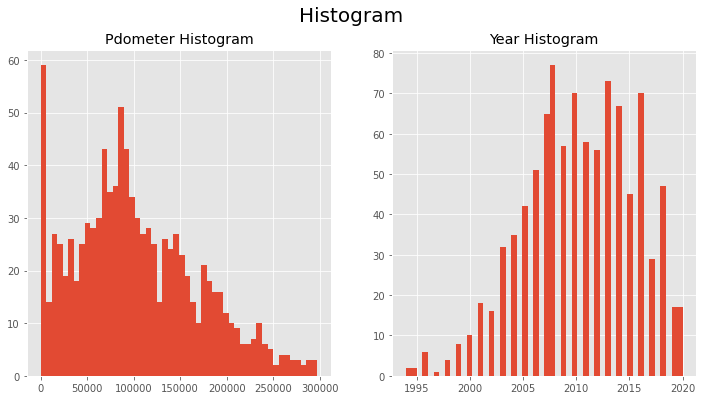

In [ ]:
plt.style.use('ggplot')

plt.figure(figsize = (12, 6))
plt.suptitle('Histogram', fontsize = 20)

plt.subplot(1, 2, 1)
plt.hist(train_df.odometer, bins = 50)              # 데이터 안의 일부 컬럼을 그래프로 표현하기 위해서는 데이터.컬럼명으로 이용한다.
plt.title('Pdometer Histogram')

plt.subplot(1, 2, 2)
plt.hist(train_df.year, bins = 50)
plt.title('Year Histogram')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

train_corr = train_df[['odometer', 'year', 'target']]
scaler = MinMaxScaler()
train_corr[train_corr.columns] = scaler.fit_transform(train_corr[train_corr.columns])
corr28 = train_corr.corr(method = 'pearson') 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


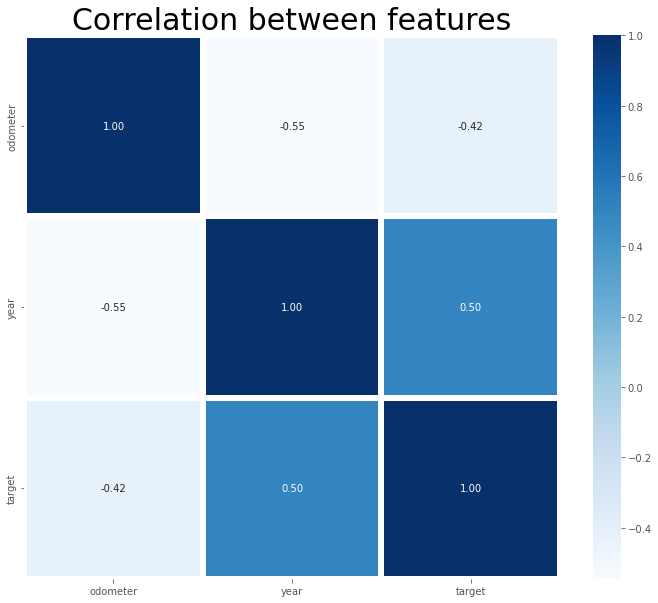

In [ ]:
import seaborn as sns

plt.figure(figsize = (12, 10))
sns.heatmap(data = corr28, annot = True, fmt = '.2f', linewidths = 5, cmap = 'Blues')
plt.title('Correlation between features', fontsize = 30)
plt.show()

# 3.데이터 라벨링

In [ ]:
# 라벨 인코딩을 하기 위한 dictionary map 생성 함수
def make_label_map(dataframe):
    label_maps = {}

    for col in dataframe.columns:
        if dataframe[col].dtype == 'object':
            label_map = {'unknown':0}
            
            for i, key in enumerate(dataframe[col].unique()):
                label_map[key] = i + 1                         # 새로 등장하는 유니크 값들에 대해 1부터 1씩 증가시켜 키값을 부여

            label_maps[col] = label_map

    print(label_maps)

    return label_maps

In [ ]:
# 각 범주형 변수에 인코딩 값을 부여하는 함수
def label_encoder(dataframe, label_map):
    for col in dataframe.columns:
        if dataframe[col].dtype == 'object':
            dataframe[col] = dataframe[col].map(label_map[col])
            dataframe[col] = dataframe[col].fillna(label_map[col]['unknown'])    # 혹시 모를 결측값은 unknown의 값(0)으로 채워줍니다.
    return dataframe

In [ ]:
le = make_label_map(train_df)
train = label_encoder(train_df, le)
train.head()

{'title': {'unknown': 0, 'Toyota RAV 4': 1, 'Toyota Land Cruiser': 2, 'Land Rover Range Rover Evoque': 3, 'Lexus ES 350': 4, 'Toyota Venza': 5, 'Toyota Corolla': 6, 'Land Rover Range Rover Sport': 7, 'Pontiac Vibe': 8, 'Toyota Tacoma': 9, 'Lexus RX 350': 10, 'Ford Escape': 11, 'Honda Civic': 12, 'Volvo XC90': 13, 'BMW 750': 14, 'Infiniti JX': 15, 'Honda Accord': 16, 'Mercedes-Benz ML 350': 17, 'Toyota Camry': 18, 'Hyundai Azera': 19, 'Lexus GX 460': 20, 'BMW 325': 21, 'Toyota Sienna': 22, 'Honda Fit': 23, 'Honda CR-V': 24, 'Hyundai Tucson': 25, 'Jaguar XJ8': 26, 'BMW X6': 27, 'Mercedes-Benz C 300': 28, 'Mitsubishi Galant': 29, 'Mercedes-Benz GL 450': 30, 'Lexus RX 300': 31, 'Toyota Highlander': 32, 'Mitsubishi CANTER PICK UP': 33, 'Nissan Titan': 34, 'Lexus IS 250': 35, 'Mercedes-Benz 200': 36, 'Toyota Sequoia': 37, 'Ford Explorer': 38, 'Hyundai ix35': 39, 'Lexus CT 200h': 40, 'Lexus LX 570': 41, 'Toyota Avensis': 42, 'Toyota 4-Runner': 43, 'Mercedes-Benz GLE 350': 44, 'Mercedes-Benz E

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
0,0,1,18277,1,1,1,1,1,1,2016,13665000,1
1,1,2,10,2,2,1,1,1,2,2019,33015000,1
2,2,3,83091,2,1,2,1,1,1,2012,9915000,2
3,3,4,91524,2,1,1,1,1,3,2007,3815000,3
4,4,5,94177,2,1,2,1,1,1,2010,7385000,1


In [ ]:
le_test = make_label_map(test)
test = label_encoder(test, le_test)
test.head()

{'title': {'unknown': 0, 'Mercedes-Benz C 300': 1, 'Honda Accord': 2, 'Mercedes-Benz S 550': 3, 'Toyota Sienna': 4, 'Toyota Hiace': 5, 'Toyota Corolla': 6, 'Iveco EUROCARGO 120e18': 7, 'Mercedes-Benz GLE 350': 8, 'Toyota Highlander': 9, 'Toyota Hilux': 10, 'Toyota Camry': 11, 'Mercedes-Benz C 180': 12, 'Lexus ES 350': 13, 'Honda Fit': 14, 'Toyota Matrix': 15, 'Toyota Venza': 16, 'Lexus IS 250': 17, 'Nissan Primera': 18, 'Volkswagen Sharan': 19, 'Jeep Wrangler': 20, 'Volkswagen Golf': 21, 'Mercedes-Benz 814': 22, 'Nissan Sentra': 23, 'Volkswagen Passat': 24, 'Mercedes-Benz GLK 350': 25, 'Lexus RX 350': 26, 'Ford Mondeo': 27, 'BMW X3': 28, 'Mack CXN613 CAB BEHIND ENGINE': 29, 'Toyota RAV 4': 30, 'Land Rover Discovery': 31, 'Toyota Avalon': 32, 'Lexus GX 460': 33, 'Hyundai Santa Fe': 34, 'Peugeot 206': 35, 'Volvo FL7': 36, 'Mercedes-Benz C 320': 37, 'Hyundai Sonata': 38, 'Infiniti FX': 39, 'Honda Civic': 40, 'Mercedes-Benz CLS 500': 41, 'Mercedes-Benz GLK 300': 42, 'Acura RDX': 43, 'Merce

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand
0,0,1,1234,1,1,1,1,1,1,2017,1
1,1,2,29938,1,2,1,1,1,1,2013,2
2,2,3,87501,2,2,1,1,1,2,2012,1
3,3,4,180894,2,3,2,1,1,3,2001,3
4,4,5,104814,2,2,1,1,1,1,2000,3


# 4.모델링

In [ ]:
x = train.drop(['id', 'target'], axis = 1)          # train 데이터에서 피쳐 추출
y = train.target                                     # train 데이터에서 중고차 가격 추출

In [ ]:
from sklearn.model_selection import train_test_split

data = train.drop('id', axis = 1).copy()        # id열 삭제
train_data, val_data = train_test_split(data, test_size = 0.25)

train_data.reset_index(inplace = True)
val_data.reset_index(inplace = True)

In [ ]:
print('학습시킬 train 셋 : ', train_data.shape)
print('검증할 val 셋 : ', val_data.shape)

학습시킬 train 셋 :  (731, 12)
검증할 val 셋 :  (244, 12)


In [ ]:
train_data_x = train_data.drop(['target', 'index'], axis = 1)              # train 데이터에서 피쳐 추출
train_data_y = train_data.target                                           # train 데이터에서 target 추출

val_data_x = val_data.drop(['target', 'index'], axis = 1)                  # val 데이터에서 피쳐 추출
val_data_y = val_data.target   

# 5.Random Forest 사용

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor()                 # 모델 정의(객체화)
model.fit(train_data_x, train_data_y)           # 학습

RandomForestRegressor()

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [ ]:
def nmae(true, pred):

    mae = np.mean(np.abs(true - pred))
    score = mae / np.mean(np.abs(true))

    return score

In [ ]:
y_hat = model.predict(val_data_x)              # y 예측
print(f'모델 NMAE : {nmae(val_data_y, y_hat)}')                       # 오차율이 대략 31.86%라는 뜻

모델 NMAE : 0.3186109066213435


# 6. 예측하기

In [ ]:
train_x = train.drop(['id', 'target'], axis = 1)                # train 데이터에서 피쳐 추출
train_y = train.target 

In [ ]:
model = RandomForestRegressor()
model.fit(train_x, train_y)

RandomForestRegressor()

In [ ]:
train_x.info

<bound method DataFrame.info of      title  odometer  location  isimported  engine  transmission  fuel  paint  \
0        1     18277         1           1       1             1     1      1   
1        2        10         2           2       1             1     1      2   
2        3     83091         2           1       2             1     1      1   
3        4     91524         2           1       1             1     1      3   
4        5     94177         2           1       2             1     1      1   
..     ...       ...       ...         ...     ...           ...   ...    ...   
970      6     46768         2           1       1             1     1      2   
971     18     31600         3           1       1             1     1      6   
972     18     96802         3           1       1             1     1      2   
973     20    146275         2           1       2             1     1     10   
974    185         0         2           3       2             2     2      4

In [ ]:
test = test.drop(['id'], axis = 1)

In [ ]:
test.info

<bound method DataFrame.info of      title  odometer  location  isimported  engine  transmission  fuel  paint  \
0        1      1234         1           1       1             1     1      1   
1        2     29938         1           2       1             1     1      1   
2        3     87501         2           2       1             1     1      2   
3        4    180894         2           3       2             1     1      3   
4        5    104814         2           2       1             1     1      1   
..     ...       ...       ...         ...     ...           ...   ...    ...   
431     25     78175         2           2       2             1     1      6   
432    107    129223         2           2       2             1     1      4   
433     91    100943         2           2       1             1     1      2   
434    124     81463         2           2       1             1     1      8   
435      4       646         2           2       2             1     1      5

In [ ]:
y_pred = model.predict(test)
y_pred[0:5]

array([27610000., 11253950.,  5661600.,  1833890.,  2667050.])

In [ ]:
submission = pd.read_csv('sample_submission.csv')
submission.head()

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [ ]:
submission.info

<bound method DataFrame.info of       id  target
0      0       0
1      1       0
2      2       0
3      3       0
4      4       0
..   ...     ...
431  431       0
432  432       0
433  433       0
434  434       0
435  435       0

[436 rows x 2 columns]>

In [ ]:
# 위에서 구한 예측값을 그대로 넣기
submission['target'] = y_pred

# 데이터 확인
submission.head()

,id,target
0,0,27610000.0
1,1,11253950.0
2,2,5661600.0
3,3,1833890.0
4,4,2667050.0


In [ ]:
submission.to_csv('submit2.csv', index = False)

# 새로운 방식

In [3]:
import pandas as pd

In [4]:
train = pd.read_csv('train_re.csv')
test = pd.read_csv('test_re.csv')

In [5]:
cat_fts2 = ['title', 'location', 'isimported', 'engine', 'transmission', 'fuel', 'paint', 'brand']

In [6]:
for i in range(len(cat_fts2)):
  print(cat_fts2[i], ":")
  print(train[cat_fts2[i]].unique())
  print("#fts :", len(train[cat_fts2[i]].unique()), '\n')

title :
['Toyota RAV 4' 'Toyota Land Cruiser' 'Land Rover Range Rover Evoque'
 'Lexus ES 350' 'Toyota Venza' 'Toyota Corolla'
 'Land Rover Range Rover Sport' 'Pontiac Vibe' 'Toyota Tacoma'
 'Lexus RX 350' 'Ford Escape' 'Honda Civic' 'Volvo XC90' 'BMW 750'
 'Infiniti JX' 'Honda Accord' 'Mercedes-Benz ML 350' 'Toyota Camry'
 'Hyundai Azera' 'Lexus GX 460' 'BMW 325' 'Toyota Sienna' 'Honda Fit'
 'Honda CR-V' 'Hyundai Tucson' 'Ford Transit' 'Jaguar XJ8' 'BMW X6'
 'Mercedes-Benz C 300' 'Mitsubishi Galant' 'Mercedes-Benz GL 450'
 'Lexus RX 300' 'Toyota Highlander' 'Mitsubishi CANTER PICK UP'
 'Nissan Titan' 'Lexus IS 250' 'Mercedes-Benz 200' 'Toyota Sequoia'
 'Ford Explorer' 'Hyundai ix35' 'Mack CH613 CONVENTIONAL CAB'
 'Lexus CT 200h' 'Lexus LX 570' 'Toyota Avensis' 'Toyota 4-Runner'
 'Mercedes-Benz GLE 350' 'Mercedes-Benz E 300' 'Toyota Avalon'
 'Chevrolet Camaro' 'Mack CXN613 CAB BEHIND ENGINE'
 'Land Rover Range Rover' 'Mazda CX-9' 'Lexus RX 330' 'Lincoln Mark'
 'Kia Optima' 'Volkswagen L

In [7]:
for i in range(len(cat_fts2)):
  print(cat_fts2[i], ":")
  print(test[cat_fts2[i]].unique())
  print("#fts :", len(test[cat_fts2[i]].unique()), '\n')

title :
['Mercedes-Benz C 300' 'Honda Accord' 'Mercedes-Benz S 550'
 'Toyota Sienna' 'Toyota Hiace' 'Toyota Corolla' 'Iveco EUROCARGO 120e18'
 'Mercedes-Benz GLE 350' 'Toyota Highlander' 'Toyota Hilux' 'Toyota Camry'
 'Mercedes-Benz C 180' 'Lexus ES 350' 'Honda Fit' 'Toyota Matrix'
 'Toyota Venza' 'Lexus IS 250' 'Nissan Primera' 'Volkswagen Sharan'
 'Jeep Wrangler' 'Volkswagen Golf' 'Mercedes-Benz 814' 'Nissan Sentra'
 'Volkswagen Passat' 'Mercedes-Benz GLK 350' 'Lexus RX 350' 'Ford Mondeo'
 'BMW X3' 'Mack CXN613 CAB BEHIND ENGINE' 'Toyota RAV 4'
 'Land Rover Discovery' 'Toyota Avalon' 'Lexus GX 460' 'Hyundai Santa Fe'
 'Peugeot 206' 'Volvo FL7' 'Mercedes-Benz C 320' 'Hyundai Sonata'
 'Infiniti FX' 'Honda Civic' 'Mercedes-Benz CLS 500'
 'Mercedes-Benz GLK 300' 'Acura RDX' 'Mercedes-Benz G 550' 'BMW 535'
 'Acura TL' 'Nissan Xterra' 'Land Rover Range Rover' 'Nissan A'
 'Toyota 4-Runner' 'Honda Pilot' 'Man LE 8. 180 PLATFORM TRUCK'
 'Toyota Yaris' 'Hyundai Elantra' 'Volvo S80' 'Mercedes-B

In [8]:
train_data = train.copy()
test_data = test.copy()

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

for i in range(len(cat_fts2)):
  onehot_encoder = OneHotEncoder(handle_unknown="ignore", sparse = False)

  transformed = onehot_encoder.fit_transform(train_data[cat_fts2[i]].to_numpy().reshape(-1, 1))
  onehot_df = pd.DataFrame(transformed, columns=onehot_encoder.get_feature_names())
  train_data = pd.concat([train_data, onehot_df], axis=1).drop(cat_fts2[i], axis=1)

  test_transformed = onehot_encoder.transform(test_data[cat_fts2[i]].to_numpy().reshape(-1, 1))
  test_onehot_df = pd.DataFrame(test_transformed, columns=onehot_encoder.get_feature_names())
  test_data = pd.concat([test_data, test_onehot_df], axis=1).drop(cat_fts2[i], axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is d

In [10]:
print(train_data.columns)
print(test_data.columns)

Index(['id', 'odometer', 'year', 'target', 'x0_ALPINA B3', 'x0_Acura MDX',
       'x0_Acura RDX', 'x0_Acura TL', 'x0_Acura ZDX', 'x0_Audi S6',
       ...
       'x0_Mitsubishi', 'x0_Nissan', 'x0_Peugeot', 'x0_Pontiac', 'x0_Porsche',
       'x0_Rolls-Royce', 'x0_Scania', 'x0_Toyota', 'x0_Volkswagen',
       'x0_Volvo'],
      dtype='object', length=292)
Index(['id', 'odometer', 'year', 'x0_ALPINA B3', 'x0_Acura MDX',
       'x0_Acura RDX', 'x0_Acura TL', 'x0_Acura ZDX', 'x0_Audi S6',
       'x0_BMW 325',
       ...
       'x0_Mitsubishi', 'x0_Nissan', 'x0_Peugeot', 'x0_Pontiac', 'x0_Porsche',
       'x0_Rolls-Royce', 'x0_Scania', 'x0_Toyota', 'x0_Volkswagen',
       'x0_Volvo'],
      dtype='object', length=291)


In [11]:
train_x = train_data.drop('id', axis = 1)
test_x = test_data.drop('id', axis = 1)

print(train_x.shape)
print(test_x.shape)

(1013, 291)
(436, 290)


In [14]:
!pip install pycaret==2.3.10 pyyaml==5.4.1 -qq

In [17]:
!pip install Jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
import pycaret

In [27]:
py_reg = setup(train_x, target = 'target', session_id = 34,silent = True)

NameError: ignored

In [29]:
import numpy as np
np.__version__

'1.21.6'

In [30]:
import pandas as pd

pd.__version__

'1.3.5'

In [32]:
import sys

sys.version

'3.7.13 (default, Apr 24 2022, 01:04:09) \n[GCC 7.5.0]'